In [1]:
irrad1_path = "/home/gonzalo/data/CC/pre-annealing-experiment/sim/v2/"
irrad2_path = "/home/gonzalo/data/CC/pre-annealing-experiment/sim/v2/"
irrad3_path = "/home/gonzalo/data/CC/pre-annealing-experiment/sim/v1/"
irrad4_path = "/home/gonzalo/data/CC/pre-annealing-experiment/sim/v3/"
irrad6_path = irrad4_path

ofilename   = "/home/gonzalo/data/CC/pre-annealing-experiment/sim/total_dose.h5"

activity           = 0.5 * 1e-3 * 3.7e10
n_gammas_per_event = 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from CCplot import figure
from CCplot import subplot
from CCplot import auto_plot_style

In [3]:
%matplotlib inline

auto_plot_style()

In [4]:
def load(path):
    return pd.read_hdf(os.path.join(path, "summary.h5"), "/data")

def dose(df, time):
    return df.dose_per_gamma * time * n_gammas_per_event * activity

In [5]:
irrad1 = load(irrad1_path)
irrad2 = load(irrad2_path)
irrad3 = load(irrad3_path)
irrad4 = load(irrad4_path)
irrad6 = load(irrad6_path)

irrad5 = irrad4.copy()
irrad5 = irrad5.assign(dose_per_gamma = 5/activity/2/20/60)

irrad  = pd.concat([irrad1, irrad2, irrad3, irrad4, irrad5, irrad6], keys=[1, 2, 3, 4, 5, 6])\
         .reset_index()\
         .drop(columns="level_1")\
         .set_index("crystal", drop=False)\
         .rename(columns=dict(level_0 = "irrad_no"))\
         .sort_values("irrad_no")\

In [6]:
minute = 60
hour   = 60 * minute
day    = 24 * hour

In [7]:
dfs = []

# CaF

In [8]:
crystal = "CaF"
df      = irrad.loc[crystal.lower()]
times   = [ 0 * day +  20 * hour + 55 * minute,
            5 * day +   0 * hour - 10 * minute,
            7 * day -   2 * hour +  0 * minute,
            4 * day -   4 * hour - 50 * minute,
            0 * day +   0 * hour + 20 * minute,
            4 * day +   0 * hour +  0 * minute]
times   = np.array(times)
doses   = dose(df, times)
dfs.append(pd.DataFrame(dict(irrad_no = np.arange(len(times)) + 1,
                             crystal  = crystal,
                             time     = times,
                             dose     = doses,
                             )))

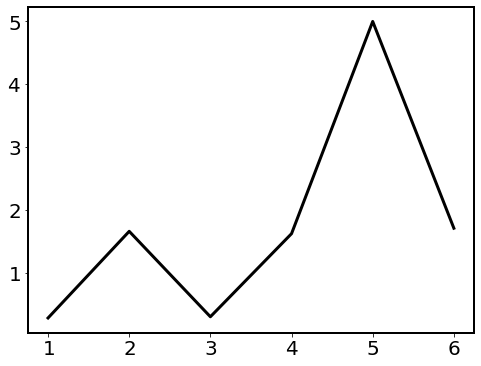

In [9]:
plt.plot(df.irrad_no, doses)

# BaF

In [10]:
crystal = "BaF"
df      = irrad.loc[crystal.lower()]
times   = [ 0 * day +  23 * hour + 50 * minute,
            2 * day +   0 * hour + 20 * minute,
            7 * day -   2 * hour +  0 * minute,
            4 * day -   4 * hour - 50 * minute,
            0 * day +   0 * hour + 20 * minute,
            4 * day +   0 * hour +  0 * minute]
times   = np.array(times)
doses   = dose(df, times)
dfs.append(pd.DataFrame(dict(irrad_no = np.arange(len(times)) + 1,
                             crystal  = crystal,
                             time     = times,
                             dose     = doses,
                             )))

In [11]:
plt.plot(df.irrad_no, doses)

# Qtz

In [12]:
crystal = "Qtz"
df      = irrad.loc[crystal.lower()]
times   = [ 1 * day +   0 * hour +  5 * minute,
            2 * day +   0 * hour +  5 * minute,
            7 * day -   2 * hour +  0 * minute,
            4 * day -   4 * hour - 50 * minute,
            0 * day +   0 * hour + 20 * minute,
            4 * day +   0 * hour +  0 * minute]
times   = np.array(times)
doses   = dose(df, times)
dfs.append(pd.DataFrame(dict(irrad_no = np.arange(len(times)) + 1,
                             crystal  = crystal,
                             time     = times,
                             dose     = doses,
                             )))

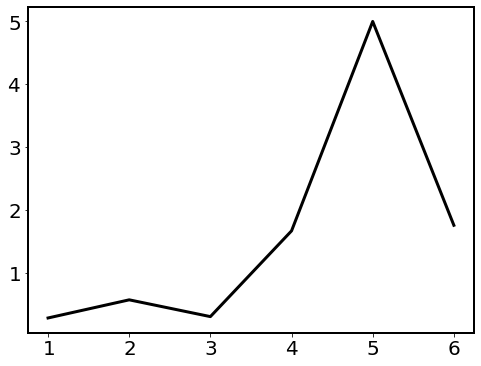

In [13]:
plt.plot(df.irrad_no, doses)

# LiF

In [14]:
crystal = "LiF"
df      = irrad.loc[crystal.lower()]
times   = [ 1 * day +   0 * hour +  5 * minute,
            2 * day +   0 * hour +  5 * minute,
            7 * day -   2 * hour +  0 * minute,
            4 * day -   4 * hour - 50 * minute,
            0 * day +   0 * hour + 20 * minute,
            4 * day +   0 * hour +  0 * minute]
times   = np.array(times)
doses   = dose(df, times)
dfs.append(pd.DataFrame(dict(irrad_no = np.arange(len(times)) + 1,
                             crystal  = crystal,
                             time     = times,
                             dose     = doses,
                             )))

In [15]:
plt.plot(df.irrad_no, doses)

# MgF

In [16]:
crystal = "MgF"
df      = irrad.loc[crystal.lower()]
times   = [ 1 * day +   0 * hour + 20 * minute,
            1 * day +   0 * hour +  0 * minute,
            7 * day -   2 * hour +  0 * minute,
            4 * day -   4 * hour - 50 * minute,
            0 * day +   0 * hour + 20 * minute,
            4 * day +   0 * hour +  0 * minute]
times   = np.array(times)
doses   = dose(df, times)
dfs.append(pd.DataFrame(dict(irrad_no = np.arange(len(times)) + 1,
                             crystal  = crystal,
                             time     = times,
                             dose     = doses,
                             )))

In [17]:
plt.plot(df.irrad_no, doses)

In [18]:
dfs = pd.concat(dfs, ignore_index=True)
dfs

irrad_no crystal    time      dose
0          1     CaF   75300  0.290978
1          2     CaF  431400  1.667038
2          3     CaF  597600  0.310276
3          4     CaF  328200  1.630106
4          5     CaF    1200  5.000000
5          6     CaF  345600  1.716529
6          1     BaF   85800  0.260107
7          2     BaF  174000  0.527490
8          3     BaF  597600  0.305249
9          4     BaF  328200  1.670574
10         5     BaF    1200  5.000000
11         6     BaF  345600  1.759142
12         1     Qtz   86700  0.289251
13         2     Qtz  173100  0.577502
14         3     Qtz  597600  0.310875
15         4     Qtz  328200  1.673262
16         5     Qtz    1200  5.000000
17         6     Qtz  345600  1.761972
18         1     LiF   86700  0.293818
19         2     LiF  173100  0.586619
20         3     LiF  597600  0.301402
21         4     LiF  328200  1.549274
22         5     LiF    1200  5.000000
23         6     LiF  345600  1.631410
24         1     MgF   87600  0.278126
25         2     MgF   86400  0.274316
26         3     MgF  597600  0.269104
27         4     MgF  328200  1.568658
28         5     MgF    1200  5.000000
29         6     MgF  345600  1.651823

In [19]:
dfs.to_hdf(ofilename, "/dose")

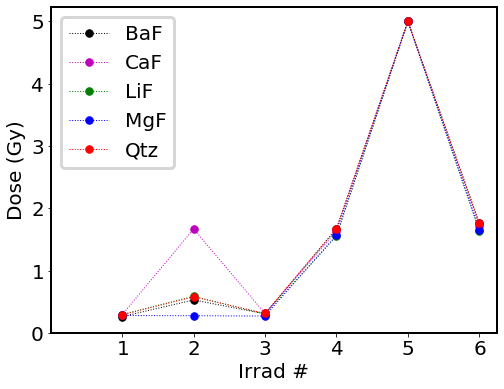

In [20]:
for crystal, df in dfs.groupby("crystal"):
    plt.plot(df.irrad_no, df.dose, ".:", lw=1, label=crystal)

plt.xlabel("Irrad #")
plt.ylabel("Dose (Gy)")
plt.xlim(0)
plt.ylim(0)
plt.xticks(df.irrad_no)
plt.legend()